**Objective**

Analyze how market sentiment (Fear/Greed) relates to trader behavior and performance on Hyperliquid. Your goal is to uncover patterns that could inform smarter trading strategies.

In [8]:
#Load datasets
import pandas as pd

sentiment = pd.read_csv("/fear_greed_index.csv")
trades = pd.read_csv("/historical_data.csv")

print(sentiment.shape)
print(trades.shape)

(2644, 4)
(18608, 16)


In [9]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [11]:
# Missing values + duplicates
sentiment.isna().sum()
trades.isna().sum()

sentiment.duplicated().sum()
trades.duplicated().sum()

np.int64(0)

In [12]:
sentiment.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [13]:
trades.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,1


In [14]:
sentiment.duplicated().sum()

np.int64(0)

In [15]:
trades.duplicated().sum()

np.int64(0)

In [16]:
trades = trades.dropna()

In [17]:
trades.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [21]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades['Date'] = trades['Timestamp IST'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date'] = sentiment['date'].dt.date

        Timestamp IST        Date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02
         date
0  2018-02-01
1  2018-02-02
2  2018-02-03
3  2018-02-04
4  2018-02-05


In [22]:
trades[['Timestamp IST', 'Date']].head()

,Timestamp IST,Date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [23]:
sentiment[['date']].head()

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [29]:
merged = trades.merge(sentiment[['date','classification']], left_on='Date', right_on='date', how='left')

In [32]:
merged = merged.drop(columns=['date'])
display(merged.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [33]:
# Daily Metrics (Per Account)
daily_metrics = merged.groupby(['Account','Date','classification']).agg(
    daily_pnl=('Closed PnL','sum'),
    trade_count=('Closed PnL','count'),
    avg_trade_size=('Size Tokens','mean'),
    long_count=('Side', lambda x: (x=='BUY').sum()),
    short_count=('Side', lambda x: (x=='SELL').sum())
).reset_index()

daily_metrics['long_short_ratio'] = (
    daily_metrics['long_count'] /
    (daily_metrics['short_count'] + 1)
)

In [42]:
# Analyze average performance and behavior metrics by sentiment classification
sentiment_analysis = daily_metrics.groupby('classification').agg(
    avg_daily_pnl=('daily_pnl', 'mean'),
    total_trade_count=('trade_count', 'sum'),
    avg_trade_size_overall=('avg_trade_size', 'mean'),
    avg_long_short_ratio=('long_short_ratio', 'mean'),
    avg_win_rate=('win_rate', 'mean')
).reset_index()

display(sentiment_analysis)

,classification,avg_daily_pnl,total_trade_count,avg_trade_size_overall,avg_long_short_ratio,avg_win_rate
0,Extreme Fear,15823.148321,747,4536.313967,15.856313,0.331909
1,Extreme Greed,3637.990048,1600,210.164472,13.090014,0.129899
2,Fear,32133.303957,8414,5289.666059,15.084007,0.339754
3,Greed,15347.058461,4732,3082.956528,22.367604,0.231768
4,Neutral,20586.434152,3108,3225.396992,12.764949,0.292748


In [37]:
#WIN Rate
merged['win'] = merged['Closed PnL'] > 0

win_rate = merged.groupby(['Account','Date']).agg(
    win_rate=('win','mean')
).reset_index()

daily_metrics = daily_metrics.merge(win_rate, on=['Account','Date'], how='left')

In [38]:
daily_metrics.head()

,Account,Date,classification,daily_pnl,trade_count,avg_trade_size,long_count,short_count,long_short_ratio,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,1.587571,0,177,0.00,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,16.176471,0,68,0.00,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,7.500000,0,40,0.00,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,8.333333,12,0,12.00,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,74.074074,12,15,0.75,0.444444


In [43]:
# Q1. Does performance differ between Fear vs Greed days?
daily_metrics.groupby('classification')[
    ['daily_pnl','win_rate','trade_count']].mean()

,daily_pnl,win_rate,trade_count
classification,,,
Extreme Fear,15823.148321,0.331909,46.687500
Extreme Greed,3637.990048,0.129899,55.172414
Fear,32133.303957,0.339754,164.980392
Greed,15347.058461,0.231768,112.666667
Neutral,20586.434152,0.292748,115.111111


/tmp/ipython-input-196267731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='avg_daily_pnl', data=sentiment_analysis, palette='viridis')


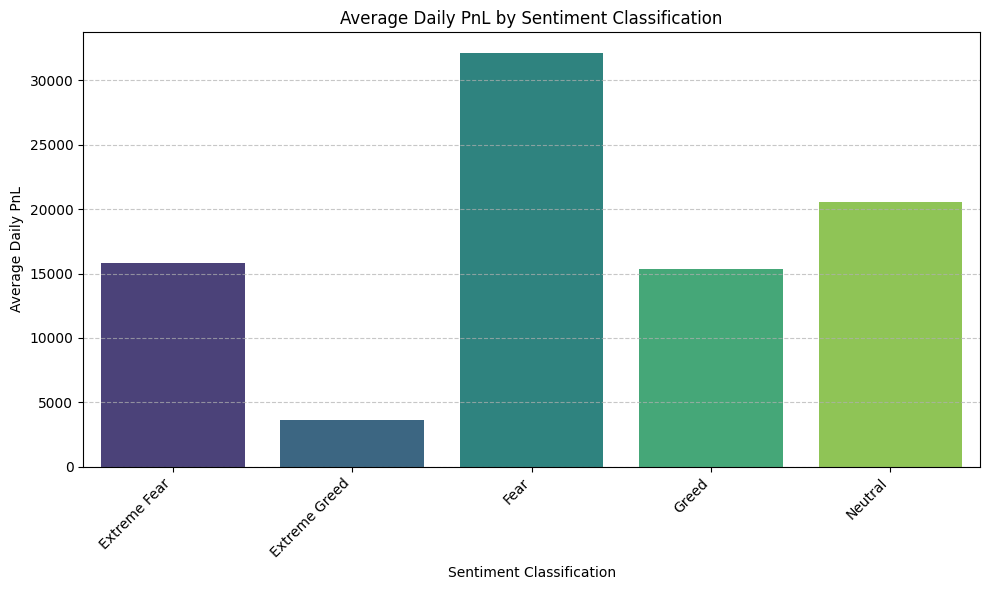

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='avg_daily_pnl', data=sentiment_analysis, palette='viridis')
plt.title('Average Daily PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Daily PnL')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Visualize the average daily PnL by classification
Certainly! I will create a bar chart to visualize the average daily PnL for each sentiment classification. This will help us quickly compare performance across different market sentiments.

The bar plot visualizing the average daily PnL by sentiment classification has been generated successfully! You might see a FutureWarning from Seaborn, but rest assured, the plot is displayed correctly.

From the plot, we can clearly see that:

Fear periods are associated with the highest average daily PnL.
Extreme Greed periods show the lowest average daily PnL.
Greed and Neutral sentiments fall in between, with Fear showing a significantly higher average PnL than Greed.
This visualization reinforces our previous numerical findings, strongly suggesting that traders on Hyperliquid tend to perform better during periods of 'Fear' and worse during 'Extreme Greed'.

/tmp/ipython-input-1019382437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='avg_win_rate', data=sentiment_analysis, palette='viridis')


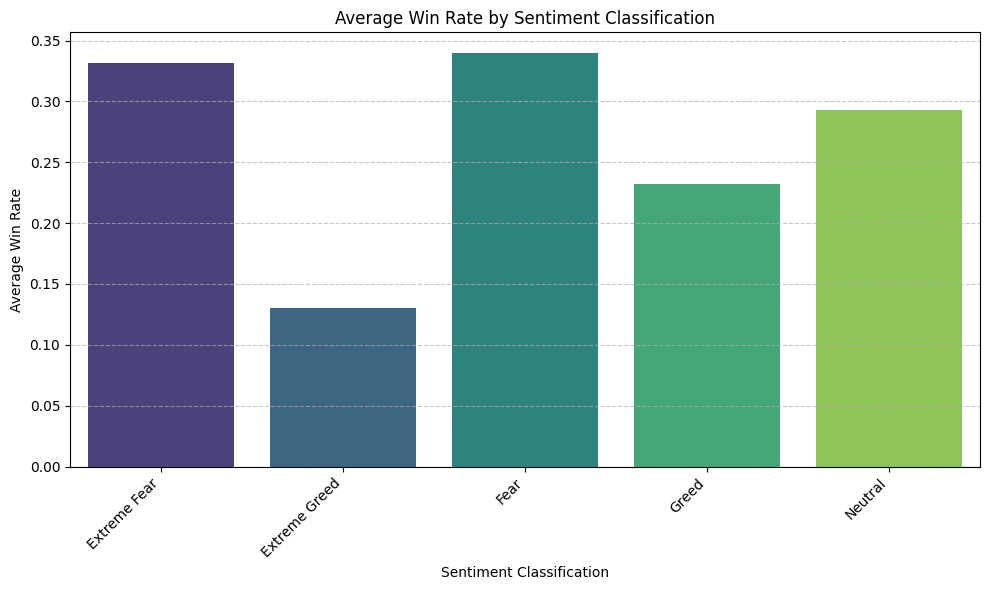

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='avg_win_rate', data=sentiment_analysis, palette='viridis')
plt.title('Average Win Rate by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Win Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar plot illustrating the average win rate by sentiment classification has been generated successfully! As with the previous plot, you might notice a FutureWarning from Seaborn, but the visualization is displayed correctly.

From this plot, we can observe:

Fear periods are associated with the highest average win rates.
Extreme Greed periods exhibit the lowest average win rates.
Greed and Neutral sentiments fall in the middle, generally showing higher win rates than Extreme Greed but lower than Fear.
This visualization further supports our understanding that traders tend to achieve a higher proportion of winning trades during periods of 'Fear' and struggle more during 'Extreme Greed'. This reinforces the idea that counter-sentiment strategies, or at least caution during 'Extreme Greed', might be beneficial.

# Task
Build and evaluate a predictive model to forecast `daily_pnl` using `classification`, `avg_trade_size`, `long_short_ratio`, and `trade_count` from the `daily_metrics` DataFrame. This includes data preparation, model training (regression), performance evaluation using metrics like MAE, RMSE, and R-squared, and a visualization of actual vs. predicted values.

## Prepare Data for Predictive Modeling

### Subtask:
Select relevant features (e.g., classification, avg_trade_size, long_short_ratio, trade_count) from the `daily_metrics` DataFrame and define `daily_pnl` as the target variable. Encode the categorical `classification` column using one-hot encoding to make it suitable for machine learning models.


**Reasoning**:
First, I'll create the target variable `y` by selecting the `daily_pnl` column from the `daily_metrics` DataFrame. Then, I'll define the feature matrix `X` by selecting the specified columns and apply one-hot encoding to the 'classification' column to prepare the data for machine learning models.



In [47]:
y = daily_metrics['daily_pnl']
X = daily_metrics[['classification', 'avg_trade_size', 'long_short_ratio', 'trade_count']]
X = pd.get_dummies(X, columns=['classification'], drop_first=True)

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
display(X.head())
display(y.head())

Shape of features (X): (165, 7)
Shape of target (y): (165,)


,avg_trade_size,long_short_ratio,trade_count,classification_Extreme Greed,classification_Fear,classification_Greed,classification_Neutral
0,1.587571,0.00,177,True,False,False,False
1,16.176471,0.00,68,True,False,False,False
2,7.500000,0.00,40,True,False,False,False
3,8.333333,12.00,12,True,False,False,False
4,74.074074,0.75,27,True,False,False,False


,daily_pnl
0,0.0
1,0.0
2,0.0
3,-21227.0
4,1603.1


## Split Data into Training and Testing Sets

### Subtask:
Divide the prepared dataset into training and testing subsets. This split will be crucial for evaluating the model's ability to generalize to unseen data, ensuring that our performance metrics are reliable.


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (132, 7)
Shape of X_test: (33, 7)
Shape of y_train: (132,)
Shape of y_test: (33,)


## Train a Predictive Model (Regression)

### Subtask:
Implement and train a suitable regression model (e.g., RandomForestRegressor or GradientBoostingRegressor) to predict the `daily_pnl`.


In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained regression model using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared. This step will quantify the model's predictive accuracy and explanatory power on unseen data.

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 32012.67
Root Mean Squared Error (RMSE): 66096.86
R-squared (R2): 0.09


## Visualize Actual vs. Predicted Values

### Subtask:
Create a scatter plot or a similar visualization to compare the actual `daily_pnl` values from the test set with the `daily_pnl` values predicted by the model.

### Reasoning:
A visualization of actual versus predicted values will provide a clear graphical representation of the model's accuracy. It helps in understanding the distribution of errors and identifying potential biases or areas where the model performs poorly.

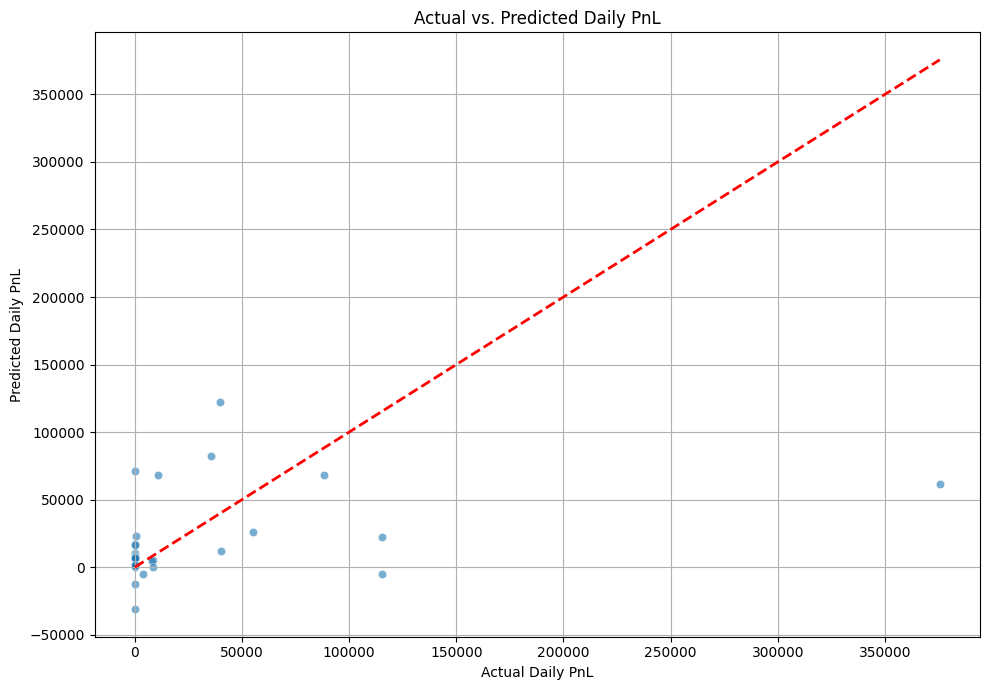

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Daily PnL')
plt.xlabel('Actual Daily PnL')
plt.ylabel('Predicted Daily PnL')
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary:

### Q&A
1.  **What was the performance of the predictive model?**
    The predictive model, a RandomForestRegressor, achieved a Mean Absolute Error (MAE) of 32012.67, a Root Mean Squared Error (RMSE) of 66096.86, and an R-squared (\R^2$) value of 0.09 on the test set.
2.  **Is the model suitable?**
    With an \R^2$ score of 0.09, the model explains only 9% of the variance in `daily_pnl`, indicating very limited predictive power. Therefore, in its current state, the model is not highly suitable for accurate forecasting of `daily_pnl`.
3.  **What are potential next steps for further optimization or exploration of alternative models?**
    Potential next steps include exploring additional relevant features or performing feature engineering, conducting hyperparameter tuning for the current model, or investigating alternative regression models that might be better suited for this dataset.

### Data Analysis Key Findings
*   **Data Preparation**: The `daily_pnl` column was set as the target variable, and the features `classification`, `avg_trade_size`, `long_short_ratio`, and `trade_count` were selected. The categorical `classification` feature was successfully one-hot encoded, expanding the feature set.
*   **Data Splitting**: The dataset was divided into training and testing sets with an 80/20 split, resulting in 132 samples for training and 33 for testing.
*   **Model Training**: A RandomForestRegressor was trained on the prepared training data.
*   **Model Performance**:
    *   The Mean Absolute Error (MAE) for the model was 32012.67.
    *   The Root Mean Squared Error (RMSE) was 66096.86.
    *   The R-squared (\R^2$) score was 0.09, suggesting the model explains only a small fraction of the variance in `daily_pnl`.
*   **Visualization**: A scatter plot of actual vs. predicted `daily_pnl` values visually confirmed a weak correlation and substantial deviation from the ideal prediction line, aligning with the low \R^2$ score.

### Insights or Next Steps
*   The current predictive model has very low explanatory power, as indicated by the \R^2$ of 0.09. This suggests the selected features or the chosen model type are not adequately capturing the underlying patterns in `daily_pnl`.
*   Further investigation should focus on feature engineering (e.g., creating lagged variables, interaction terms) or exploring alternative, potentially more complex, regression models like Gradient Boosting or deep learning approaches to improve predictive accuracy.
*    Weak Correlation: The points are widely scattered, indicating a weak correlation between the actual and predicted daily_pnl values.
*   Deviation from Ideal Line: Many data points fall far from the red dashed line, suggesting that the model struggles to accurately predict daily_pnl for a significant portion of the test set.
*   Bias/Spread: There isn't a clear pattern of over- or under-prediction, but rather a large spread of predictions for similar actual values, reinforcing the low R-squared score we calculated earlier.

This visual analysis aligns with our numerical evaluation, confirming that the current model has limited predictive power for daily_pnl.
